# Теория вероятностей и математическая статистика

## Домашнее задание №2

*Резепова Софья*

Загрузите данные из CSV-файла с вашей фамилией [отсюда](https://disk.yandex.ru/d/9AkPX4tUf2caGA), сохраните их в датафрейм и выполните следующие задания.

Пояснения по столбцам:

* `city`: название города;
* `Decibel_Level`: уровень шума;
* `Traffic_Density`: плотность трафика, транспортная загруженность;
* `Green_Space_Area`: площадь зеленых насаждений;
* `Air_Quality_Index`: индекс качества воздуха (чем выше, тем грязнее воздух);
* `Happiness_Score`: индекс счастья;
* `Cost_of_Living_Index`: индекс стоимости жизни;
* `Healthcare_Index`: индекс качества здравоохранения.

### Задача 0 (2 балла)

Оставьте в датафрейме только те строки, которые соответствуют **городам с характерными значениями уровня счастья и уровня шума**.

Чтобы было проще удалять выбросы из данных, минуя вычисление границ типичных значений, ниже предлагается пример готового кода для извлечения нетипичных значений из построенного ящика с усами (датафрейм `df`, столбец `x`).

    from matplotlib import pyplot as plt
    my_box = plt.boxplot(df["x"])
    outliers = my_box["fliers"][0].get_ydata()
    
Внутри `my_box` хранится словарь с элементами ящика с усами, которые `matplotlib` использует для отрисовки (все названия во множественном числе, так как можно строить несколько ящиков с усами в одних осях):

* `"whiskers"`: линии усов;
* `"caps"`: горизонтальные линии на конце усов ящика;
* `"boxes"`: набор линий для ящика (нижний квартиль, медиана, верхний квартиль);
* `"medians"`: горизонтальная линия для медианы;
* `"fliers"`: точки, соответствующие нехарактерным значениям.

В `my_box["fliers"]` хранится список графических элементов, используемых для отметки точек за рамками усов. Здесь ящик с усами один, в списке только один элемент с индексом 0. Извлекаем его и забираем оттуда значения по оси `y` – это и есть выбросы.

In [1]:
import pandas as pd
data = pd.read_csv("Резепова Софья Владимировна.csv")
data.head()

,City,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
0,Napier,50,Low,140,25,8.3,30,97
1,Stockholm,55,Low,80,30,8.0,100,97
2,Putaruru,55,Low,155,30,8.1,25,96
3,Mangawhai,50,Low,260,25,5.8,20,97
4,Nelson,50,Low,100,10,8.5,70,97


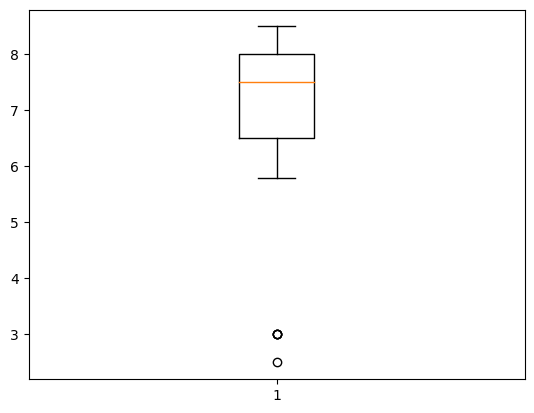

In [2]:
from matplotlib import pyplot as plt
box_h = plt.boxplot(data["Happiness_Score"])
out_h = box_h["fliers"][0].get_ydata()

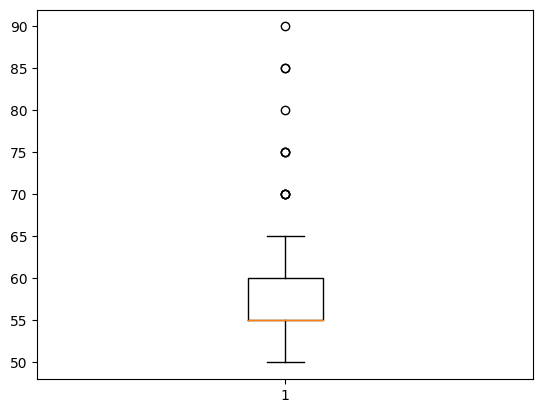

In [3]:
box_n = plt.boxplot(data["Decibel_Level"])
out_n = box_n["fliers"][0].get_ydata()

In [4]:
f_data = data[
    (data["Happiness_Score"].isin(out_h) == False) &
    (data["Decibel_Level"].isin(out_n) == False)
]

### Задача 1 (4 балла)

*(0.5 балла)* Оцените модель линейной регрессии, которая позволит предсказывать уровень счастья жителей города (`Happiness_Score`) в зависимости от уровня шума в городе (`Decibel_Level`). Выведите результаты полученной модели – основную выдачу с коэффициентами. 

a. *(1 балл)* Запишите (с конкретными числами из выдачи) уравнение полученной модели.

b. *(1 балл)* Содержательно проинтерпретируйте коэффициенты в полученном уравнении модели. Если константа содержательно не интерпретируема, укажите это.

c. *(1 балл)* Запишите, чему равно наблюдаемое значение статистики критерия, используемое для проверки гипотезы о коэффициенте $\hat{b}_1$. Можно ли считать, приняв уровень доверия 0.95 (уровень значимости 0.05), что независимая переменная оказывает значимый эффект на зависимую? Обоснуйте свой ответ.

d. *(0.5 балла)* Запишите, чему равен $R^2$ модели и проинтерпретируйте ее предсказательную силу.

In [5]:
import statsmodels.api as sm
y = f_data["Happiness_Score"]
x = f_data["Decibel_Level"]
x = sm.add_constant(x)

In [6]:
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness_Score   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     13.40
Date:                Sun, 01 Jun 2025   Prob (F-statistic):           0.000589
Time:                        19:50:54   Log-Likelihood:                -54.779
No. Observations:                  54   AIC:                             113.6
Df Residuals:                      52   BIC:                             117.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.7272      1.155     10.153

**а)**  Уравнение 

$$
\hat{y} = 11.7272 - 0.0755 \cdot x
$$

**b)** Коэффициент при  x означает, что при увеличении уровня шума на $1$ децибел уровень счастья в среднем снижается на $0.0755$. Константа в данном случае не интерпретируема: по определению это ожидаемый уровень счастья при $х = 0$.


**с)** Статистика критерия $-3.660$
$$  p-value = 0.001 < 0.05 \$$
==> отклоняем нулевую гипотезу, независимая переменная (уровень шума) оказывает статистическое влияние на зависимую (на уровень счастья)

**d)** $R^2 = 0.205$ \
примерно 20.5% дисперсии уровня счастья объясняется уровнем шума

### Задача 2 (4 балла)

*(2 балла)* Сохраните остатки модели (разница между фактическими и предсказанными значениями) в отдельный столбец датафрейма, с которым вы работаете. Выведите для них описательные статистики и постройте гистограмму. Постройте диаграмму рассеивания между значениями независимой переменной и остатками модели. 

*(2 балла)* Прокомментируйте полученные результаты в контексте выполнения/не выполнения некоторых условий Гаусса-Маркова+ (условия Гаусса-Маркова с лекции + нормальность остатков).

In [7]:
data["residuals"] = model.resid
data.head()

,City,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index,residuals
0,Napier,50,Low,140,25,8.3,30,97,0.346743
1,Stockholm,55,Low,80,30,8.0,100,97,0.424138
2,Putaruru,55,Low,155,30,8.1,25,96,0.524138
3,Mangawhai,50,Low,260,25,5.8,20,97,-2.153257
4,Nelson,50,Low,100,10,8.5,70,97,0.546743


In [8]:
print(data["residuals"].describe())

count    5.400000e+01
mean    -2.565849e-15
std      6.735623e-01
min     -2.153257e+00
25%     -3.758621e-01
50%      1.467433e-01
75%      4.241379e-01
max      1.001533e+00
Name: residuals, dtype: float64


In [9]:
import seaborn as sns

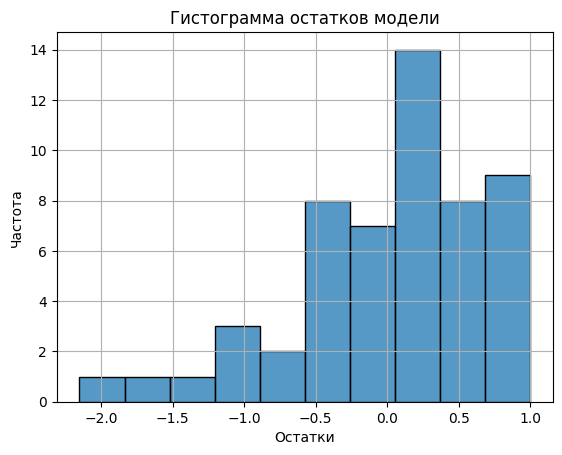

In [10]:
plt.figure()
sns.histplot(data["residuals"], bins=10)
plt.title("Гистограмма остатков модели")
plt.xlabel("Остатки")
plt.ylabel("Частота")
plt.grid(True)
plt.show()

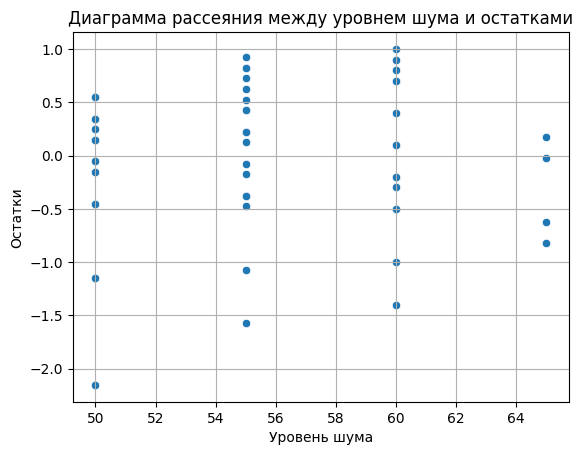

In [11]:
plt.figure()
sns.scatterplot(x=data["Decibel_Level"], y=data["residuals"])
plt.title("Диаграмма рассеяния между уровнем шума и остатками")
plt.xlabel("Уровень шума")
plt.ylabel("Остатки")
plt.grid(True)
plt.show()


Дополнительный график для проверки нормальности (сравнение распределения остатков с нормальным)

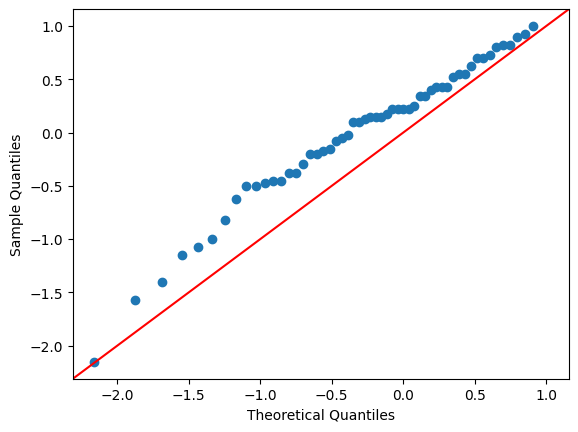

In [12]:
sm.qqplot(data["residuals"], line="45")
plt.show()


1. **Несмещенность оценок** (в среднем ошибки не склоняются вверх или вниз, не зависят от значений независимой переменной) выполняется, остатки колеблются вокруг 0 (видно по диаграмме рассеяния)
$$ Cov(x_i ,ε_i )=0$$

2. **Гомоскедастичность** (дисперсия остатков должна быть постоянной при любом значении независимой переменной) выполняется. Признаков гетероскедастичности нет, так как визуально на диаграмме рассеяния нет явной воронки или веера.

3.  Durbin-Watson $= 2.079$, это близко к 2, что означает отсутствие автокорреляции, то есть **независимость остатков** 
$$ Cov(ε_j ,ε_i )=0$$

4. **Остатки не нормально распределены**\
$Skew = -0.966 $. Это означает, что есть левосторонняя ассиметрия (на дополнительном графике qqplot остатков это тоже видно, если остатки были бы нормально распределены, то точки на графике лежали примерно на красной линии)\
Также $Kurtosis = 3.883$ выше номального (у нормального = 3)

Вывод: в целом, модель **удовлетворяет ключевым условиям Гаусса-Маркова**

### Задача 3 (2 балла)

Реализуйте ANOVA и проверьте на 5%-ном уровне значимости, можно ли считать средний уровень счастья равным в городах с очень высокой, высокой, средней и низкой транспортной загруженностью.

* Сформулируйте нулевую и альтернативную гипотезу. 
* Приведите код Python для проверки и сделайте содержательный вывод.

In [13]:
f_data["Traffic_Density"].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [14]:
from scipy.stats import f_oneway


low = data[data["Traffic_Density"] == "Low"]["Happiness_Score"]
medium = data[data["Traffic_Density"] == "Medium"]["Happiness_Score"]
high = data[data["Traffic_Density"] == "High"]["Happiness_Score"]


f_stat, p_value = f_oneway(low, medium, high)

print(f"F-статистика: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")

F-статистика: 18.5882
p-value: 0.0000


$$ p-value = 0.0000 < 0.05 $$ 
==> **отклоняем нулевую гипотезу** $H_0$ (средний уровень счастья статистически значимо не отличается хотя бы для одной из групп транспортной загруженности) в пользу альтернативной $H_1$ (средний уровень счастья статистически значимо отличается хотя бы для одной из групп транспортной загруженности)

### Задача 4 (3 балла)

Постройте модель линейной регрессии, где зависимой переменной является уровень счастья, а независимой – уровень транспортной загруженности. 

Если используете возможности `statsmodels`, текстовая переменная автоматически разбивается на набор $k$ бинарных переменных (здесь – высокий уровень или нет, средний уровень или нет, низкий уровень или нет, очень высокий уровень или нет), одна из бинарных переменных выкидывается во избежание строгой линейной зависимости, и строится множественная регрессия с $k-1$ бинарными независимыми переменными.

*(1 балл)* Выведите для модели основную выдачу с коэффициентами и ANOVA-таблицу. Убедитесь, что значение F-статистики в основной выдаче совпадает со значением F-статистики в ANOVA-таблице.

In [15]:
import statsmodels.formula.api as smf

model = smf.ols("Happiness_Score ~ C(Traffic_Density)", data=f_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness_Score   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     7.798
Date:                Sun, 01 Jun 2025   Prob (F-statistic):            0.00111
Time:                        19:51:38   Log-Likelihood:                -53.764
No. Observations:                  54   AIC:                             113.5
Df Residuals:                      51   BIC:                             119.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [16]:
import statsmodels.api as sm

anova = sm.stats.anova_lm(model, typ=2)
print(anova)

                       sum_sq    df         F   PR(>F)
C(Traffic_Density)   7.081926   2.0  7.797794  0.00111
Residual            23.159000  51.0       NaN      NaN


**Значения совпадают**

$7.798 \approx 7.797794$

Группа, соответствующая 1 в бинарной переменной, которая была исключена из модели, считается *базовой категорией*, с которой сравниваются все остальные. В такой модели коэффициенты при независимых переменных – разность средних значений зависимой переменной между соответствующей группой и базовой категорией.

*(2 балла)* Укажите, какая категория является базовой в данном случае. Запишите уравнение полученной модели и проинтерпретируйте полученные коэффициенты. Приняв уровень значимости 1%, определите, в каких парах групп различия в среднем уровне счастья можно считать статистически значимыми.

$\text{High - базовая категория (так как ее нет в таблице)}$

$\text{Уравнение модели:}$

$$
\hat{y} =
\begin{cases}
6.7200 + 1.0457 = 7.7657, & \text{если Low} \\
6.7200 + 0.4443 = 7.1643, & \text{если Medium} \\
6.7200 = 6.7200 & \text{если High (базовая)} \
\end{cases}
$$


Интерпретация:

При низкой загруженности уровень счастья в среднем выше на $1.0457$, чем при высокой

При средней загруженности уровень счастья в среднем выше на $0.4443$, чем при высокой

$Intercept = 6.7200$ - средний уровень счастья при базовой категории

$$
p-value = 0.002 > 0.001 
$$
$$
p-value = 0.211 > 0.001 
$$
===> средние уровни счастья в группах с низкой и средней загруженностью статистически значимо **не отличаются** от уровня в группе с высокой  загруженностью